### Problem Statement:
#### Housing Case Study

Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

* To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
* To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
* To know the accuracy of the model, i.e. how well do these variables predict the house prices


### We'll do following steps in this exercise:
1. Reading and Understanding data
2. Visualising the data
3. Data Preparation
4. Splitting the data into traing and testing data set and rescaling the variables 
5. Building a linear model 
6. Residual Analysis
7. Making prediction using the final model

### Step 1: Reading and Understanding data

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()
#describe shows all the stats of continuous variables

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Step 2: Visualising the data

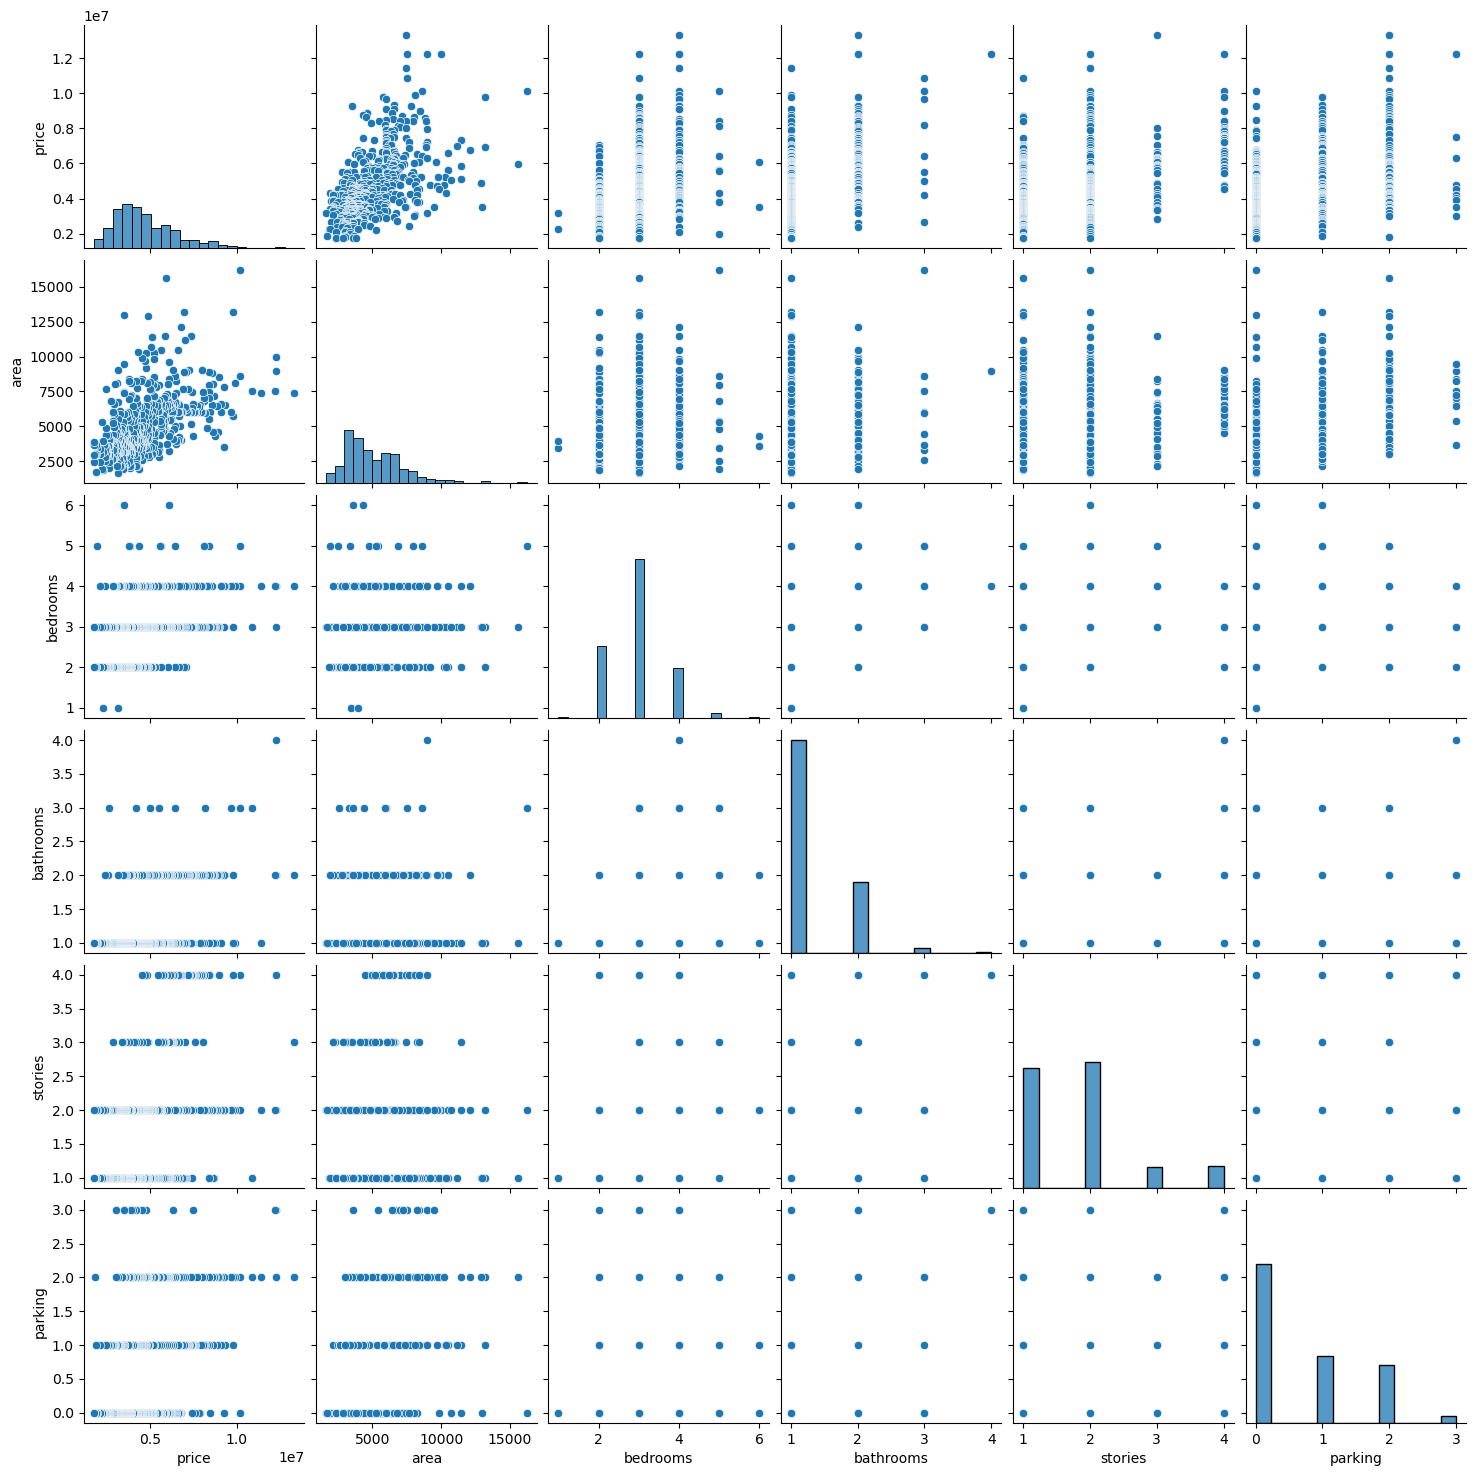

In [6]:
#Visualising target varibale and numerical variables
sns.pairplot(df)
plt.show()

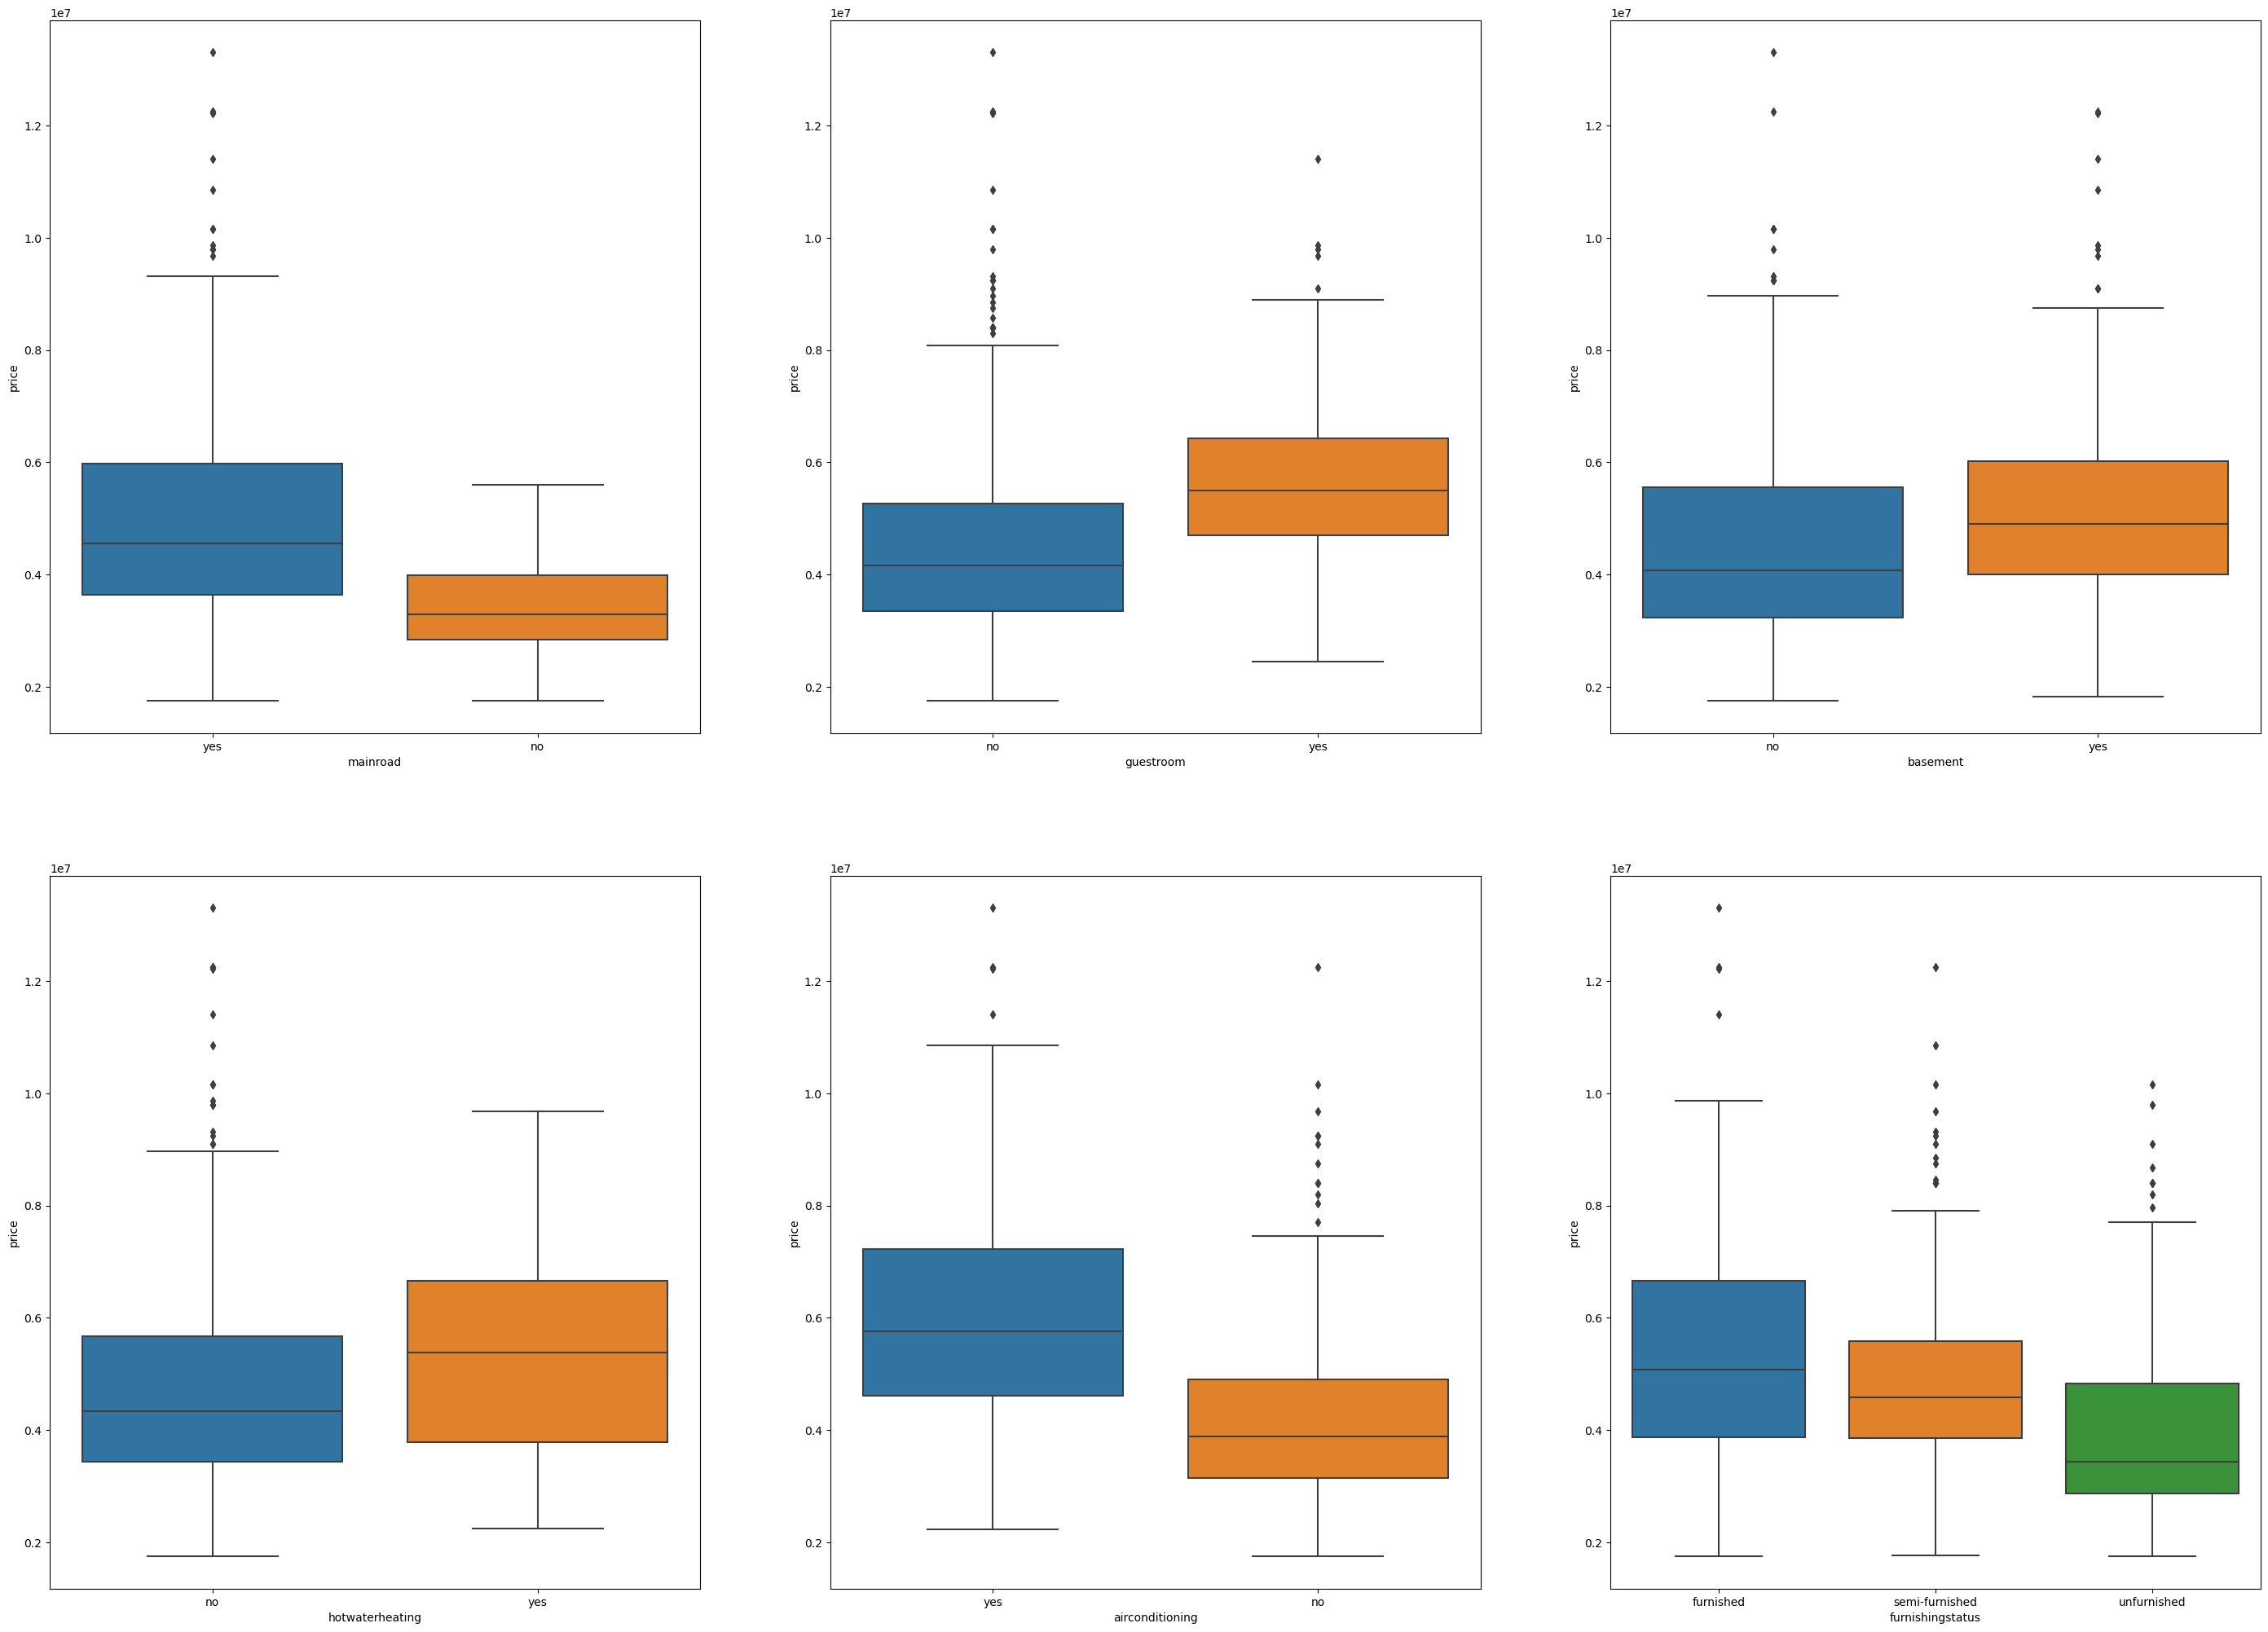

In [7]:
#visualising target variable(continuous) and categorical variables 
plt.figure(figsize=(35, 25))

plt.subplot(2, 3, 1) # this mean 2 rows, 3 col and 1st plot
sns.boxplot(x= 'mainroad', y= 'price', data= df)
plt.subplot(2, 3, 2)
sns.boxplot(x= 'guestroom', y= 'price', data= df)
plt.subplot(2, 3, 3)
sns.boxplot(x = 'basement', y = 'price', data= df)
plt.subplot(2, 3, 4)
sns.boxplot(x= 'hotwaterheating', y= 'price', data= df)
plt.subplot(2, 3, 5)
sns.boxplot(x= 'airconditioning', y= 'price', data= df)
plt.subplot(2, 3, 6)
sns.boxplot(x= 'furnishingstatus', y= 'price', data= df)
plt.show()

### Step 3: Data preparation or preparing data for modeling
    - Encoding:
        * Converting binary vars to 0/1
        * Other categorical variables to dummy variables 
  

In [8]:
# 1st treating all yes/no columns
binary_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_var].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [9]:
df[binary_var] = df[binary_var].apply(lambda x : x.map({'yes' : 1, 'no' : 0}))
df[binary_var].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


#### Creating dummy variable  

In [10]:
#2nd we need to create dummy variable for categorical variable furnishingstatus
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
#for categorical variable of level 'K' we need 'K-1' representation in columns
status = pd.get_dummies(df['furnishingstatus'],drop_first=True) #this will drop the first column 
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
df = pd.concat([df, status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
df = df.drop('furnishingstatus', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Step 4: Splitting data into train and test 

In [14]:
df_train, df_test = train_test_split(df, train_size=0.70 ,random_state=100)

In [15]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


#### Rescaling data: ( two benefits: Understanding coefficients is easy or readability and Gradient decent conversion is faster)
* #### Normalization (min-max scale - maps data points in the range 0 - 1), formula: (x - xmin)/ (xmax - xmin)
* #### Standarization: mean centered between 0 with standard deviation 1, formula: (x- mu) / sigma

In [16]:
# 1. Instantiate a object 
scaler = MinMaxScaler()

# create a list of numeric variables because we do not want to rescale the categorical and dummy variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,price,area,bedrooms,bathrooms,stories,parking
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667


### Step 5: Building model or training a model 

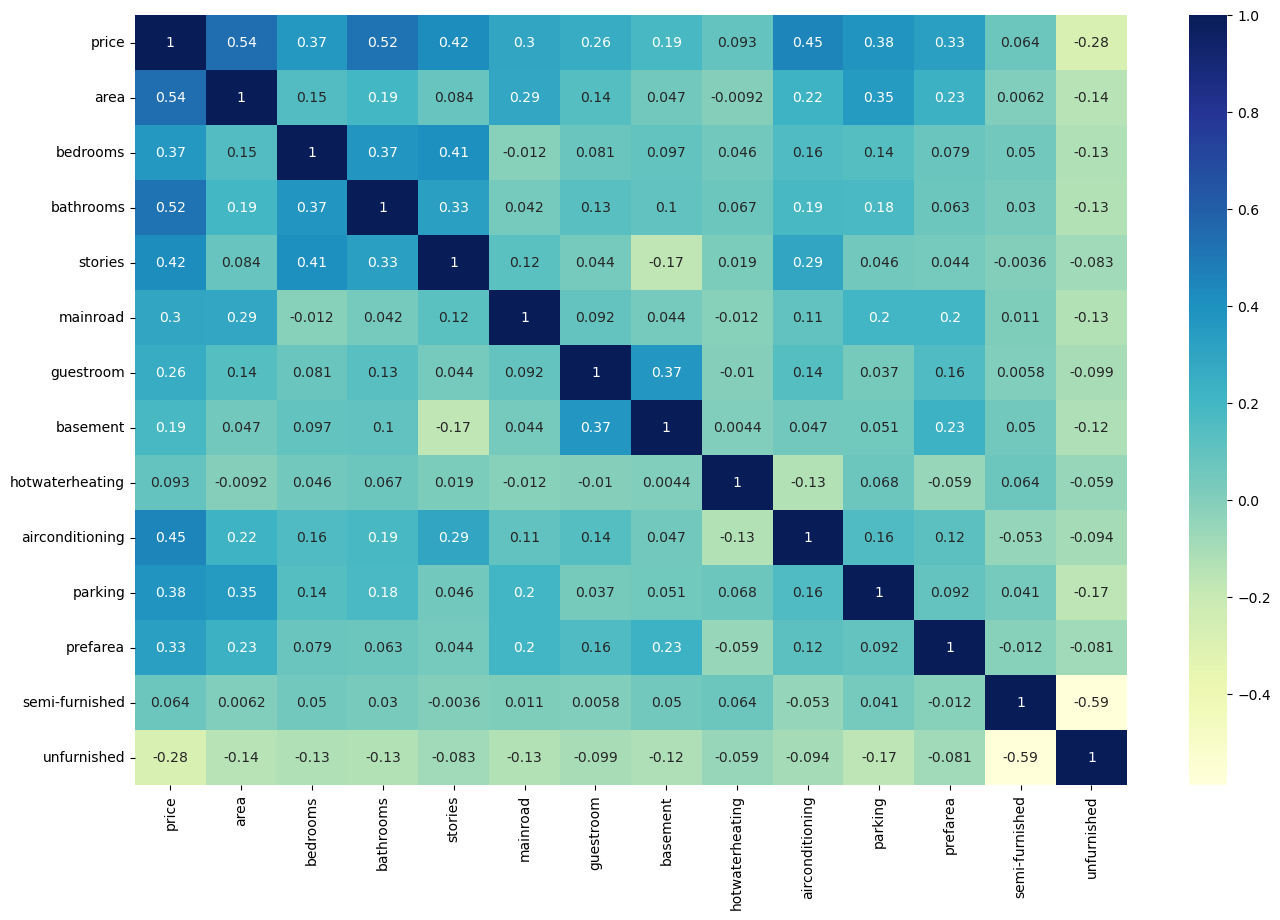

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

### First lets us look at how forward approach of building model looks like. That is adding one variable at a time

In [18]:
y_train = df_train.pop('price')
X_train = df_train

In [19]:
print(y_train.head())


359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64


In [20]:
print(X_train.head())

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
359  0.155227       0.4        0.0  0.000000         1          0         0   
19   0.403379       0.4        0.5  0.333333         1          0         0   
159  0.115628       0.4        0.5  0.000000         1          1         1   
35   0.454417       0.4        0.5  1.000000         1          0         0   
28   0.538015       0.8        0.5  0.333333         1          0         1   

     hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
359                0                0  0.333333         0               0   
19                 0                1  0.333333         1               1   
159                0                1  0.000000         0               0   
35                 0                1  0.666667         0               0   
28                 1                0  0.666667         0               0   

     unfurnished  
359            1  
19             0  
159  

In [21]:
#taking 1st variable as area
X_train_sm = sm.add_constant(X_train['area'])
X_train_sm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [22]:
lr = sm.OLS(y_train, X_train_sm)

#build model using first variable
lr_model = lr.fit()

lr_model.summary()
#observation: Look at positive coefficients, p-value which is less than 0.05 and R-squared values as 28%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.15e-29
Time:                        19:31:31   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Lets add another variable 
X_train_sm = X_train[['area', 'bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [24]:
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.51e-54
Time:                        19:31:31   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Lets add another variable 
X_train_sm = X_train[['area', 'bathrooms','stories']]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,area,bathrooms,stories
359,1.0,0.155227,0.0,0.000000
19,1.0,0.403379,0.5,0.333333
159,1.0,0.115628,0.5,0.000000
35,1.0,0.454417,0.5,1.000000
28,1.0,0.538015,0.5,0.333333


In [26]:
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()
#here, we have negative coefficient, hence we definately have to look at it

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     150.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.56e-64
Time:                        19:31:31   Log-Likelihood:                 313.95
No. Observations:                 381   AIC:                            -619.9
Df Residuals:                     377   BIC:                            -604.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.011      6.667      0.000       0.053       0.097
area           0.3934      0.031     12.859      0.000       0.333       0.454
bathrooms      0.2463      0.024     10.085      0.000       0.198       0.294
stories        0.1434      0.019      7.382      0.000       0.105       0.182
==============================================================================
Omnibus:                       75.584   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.577
Skew:                           0.897   Prob(JB):                     1.41e-50
Kurtosis:                       6.353   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Another approach known as backward approach, where we take all variables and then remove while proceeding and analysis

In [27]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [28]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.83e-83
Time:                        19:31:31   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#To remove variables check both p-value(significance) and VIF (variance inflation factor)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values ,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### We could have:
    - High p-value and High VIF
    - Low/High:
        * High p-value, low VIF: remove these first
        * High VIF, low p-value: remove them after
    - Low p-value, low VIF

In [30]:
# Removing semi-furnished as it has high p-value
X = X_train.drop('semi-furnished', axis=1)

In [31]:
X_train_sm = sm.add_constant(X)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [32]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.07e-83
Time:                        19:31:32   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [34]:
#since p-value of bedrooms and VIF is also high, we can drop this as well
X = X.drop('bedrooms', axis=1)


In [35]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.73e-84
Time:                        19:31:32   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Step 6: Residual Analysis

In [37]:
# here we have to ask model to predict the values for y that is target value and then 
# calculate the residuals (predicted - actual)
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred .head()

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
dtype: float64

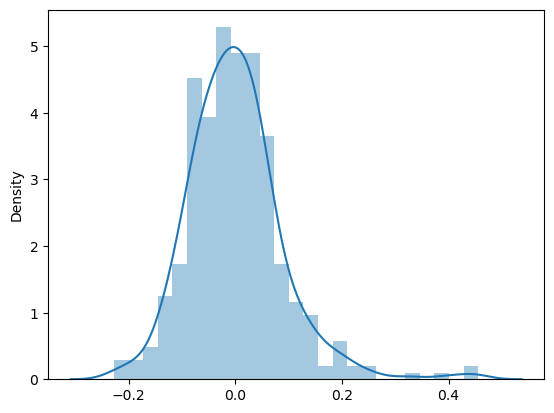

In [38]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

### Step 6: Making prediction using the final model

### Key points to remember: 
1. Do same preprocessing steps for test data as you have done for training data set e.g. scalling (MinMax scalling)
2. Remove columns from test data which you have removed while trainging because trained model do not know coefficients for them and will throw error
3. Always use transform function with test data because fit and fit_transform will get a glimpse of test data and might learn some points. Do don't want model to see test data before the final pricess.
    #### fit() - with training data
    #### transform() - with test data
    #### fit_transform() - with training data

In [39]:
# first scale your data points 
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [40]:
# second remove unsed cols
df_test = df_test.drop(['bedrooms','semi-furnished'], axis=1)
df_test.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,0.229697,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,0.484848,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,0.303030,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,0.242424,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,0.227879,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0


In [41]:
y_test = df_test.pop('price')
X_test = df_test

In [42]:
y_test.head()

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
Name: price, dtype: float64

In [43]:
X_test.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0


In [44]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0


#### Predict

In [45]:

# our trained model is: lr_model
# ask model to predic y for test data
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head()

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
dtype: float64

##### Evaluate model


In [46]:
r2_score(y_true=y_test, y_pred=y_test_pred)


0.6713505684480789

### So, our model seems to be generalised as 
    - r2-score for training: 68%
    - r2-score for test: 67% 